Admission campaign analysis


АВТОМАТИЧЕСКИЙ ПОИСК ИНТЕРВАЛА
Поиск интервала с разными знаками:
a = 0.0: f(0.0) =  27.000 (+)
a = 0.1: f(0.1) =  17.706 (+)
a = 0.2: f(0.2) =  10.989 (+)
a = 0.3: f(0.3) =   6.234 (+)
a = 0.4: f(0.4) =   2.885 (+)
a = 0.5: f(0.5) =   0.438 (+)
a = 0.6: f(0.6) =  -1.555 (-)
НАЙДЕН ИНТЕРВАЛ: [0.5, 0.6]
   f(0.5) = 0.438 > 0, f(0.6) = -1.555 < 0
   → Гарантирован корень на [0.5, 0.6]
Метод бисекции:
Итерация   a            b            c            f(c)               Интервал
---------------------------------------------------------------------------
1          0.500000     0.600000     0.550000       -0.589856        [0.5000, 0.6000]
2          0.500000     0.550000     0.525000       -0.087022        [0.5000, 0.5500]
3          0.500000     0.525000     0.512500     +  0.172129        [0.5000, 0.5250]
4          0.512500     0.525000     0.518750     +  0.041827        [0.5125, 0.5250]
5          0.518750     0.525000     0.521875       -0.022773        [0.5188, 0.5250]
6          0.5

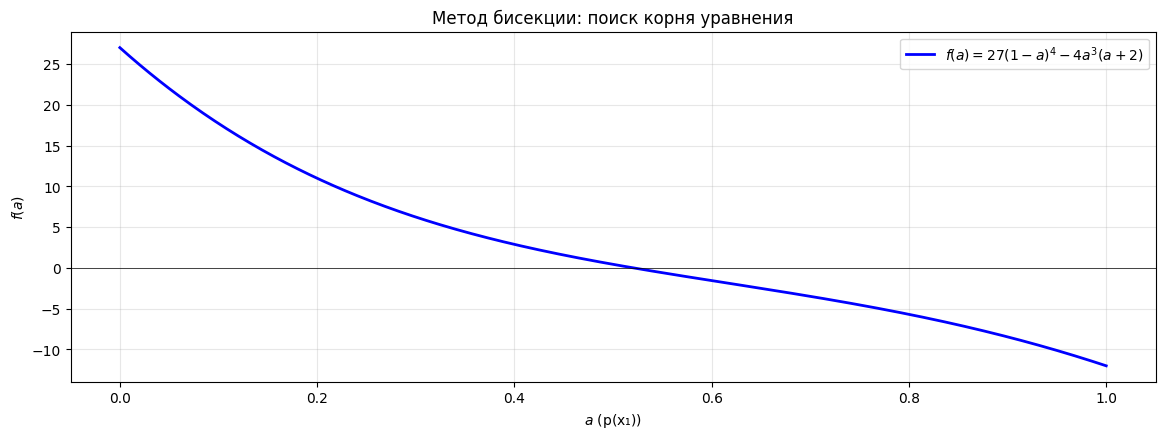

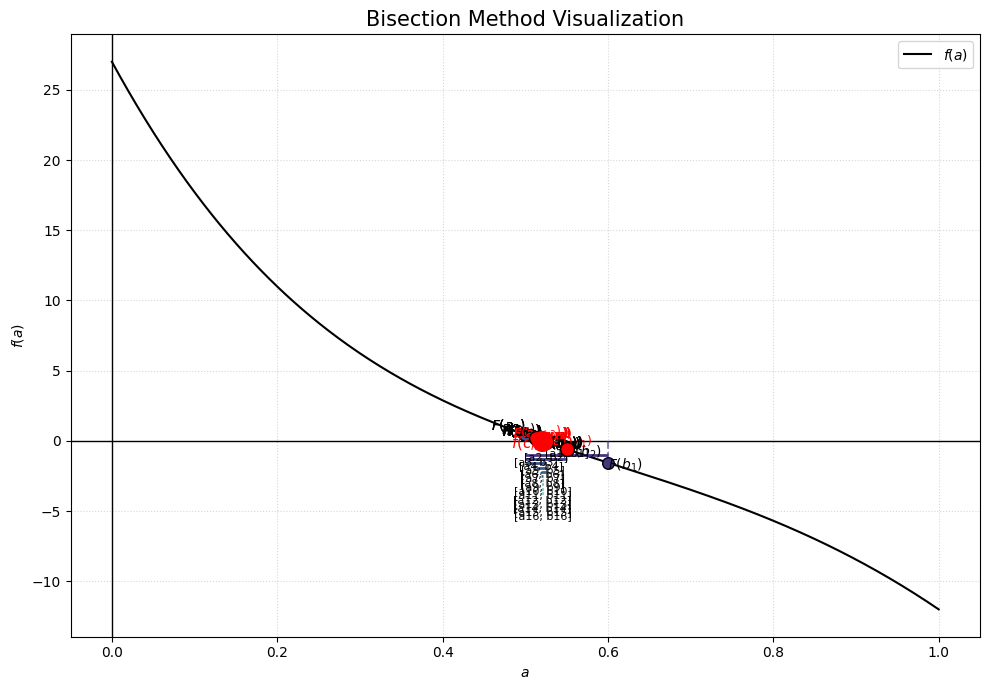

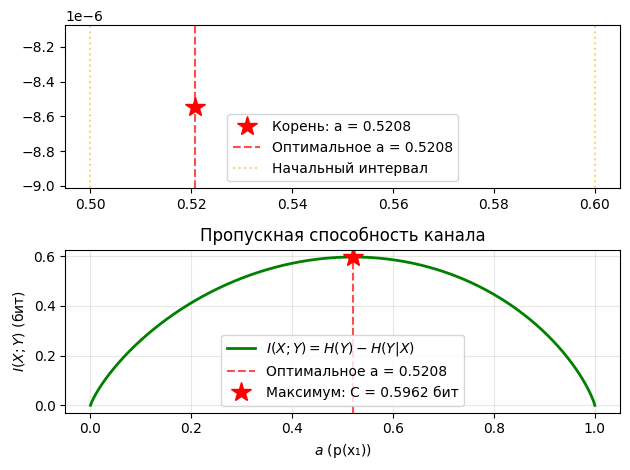


ВЫЧИСЛЕНИЕ ПРОПУСКНОЙ СПОСОБНОСТИ:
Оптимальное распределение: p(x₁) = 0.5208, p(x₂) = 0.4792

Распределение на выходе:
p(y₁) = 0.2604, p(y₂) = 0.4201, p(y₃) = 0.3195
H(Y) = 1.5570 бит
H(Y|X) = 0.5208×1.000 + 0.4792×0.918 = 0.9608 бит

I(X;Y) = H(Y) - H(Y|X) = 1.5570 - 0.9608 = 0.5962 бит

ФИНАЛЬНЫЙ РЕЗУЛЬТАТ:
Оптимальное входное распределение: p(x₁) = 0.5208, p(x₂) = 0.4792
Пропускная способность канала: C = 0.5962 бит/символ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(a):
    return 27 * (1 - a)**4 - 4 * a**3 * (a + 2)

def visualize_bisection(iterations, f):
    # Берём первый и последний интервал
    a0, b0 = iterations[0][0], iterations[0][1]
    a_last, b_last = iterations[-1][0], iterations[-1][1]

    # Формируем диапазон немного шире найденного интервала
    pad = (b0 - a0) * 0.3
    x_min = a0 - pad
    x_max = b0 + pad

    # Создаём фигуру
    plt.figure(figsize=(9, 6))
    plt.title("Bisection Method – Focused View", fontsize=14)
    plt.xlabel("$a$")
    plt.ylabel("$f(a)$")

    # Диапазон функции только в области поиска
    x = np.linspace(x_min, x_max, 600)
    y = f(x)
    plt.plot(x, y, 'k-', linewidth=2)

    # Оси
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Сетка
    plt.grid(True, linestyle=':', alpha=0.4)

    # Цветовая шкала итераций
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(iterations)))

    # Подбор масштаба Y
    y_all = [f(a) for a, _, _, _ in iterations] + [f(b) for _, b, _, _ in iterations]
    y_min, y_max = min(y_all), max(y_all)
    plt.ylim(y_min - abs(y_min)*0.4, y_max + abs(y_max)*0.4)

    # Основной цикл итераций
    for i, (a, b, c, fc) in enumerate(iterations):
        fa, fb = f(a), f(b)

        # Вертикальные пунктирные линии
        plt.plot([a, a], [0, fa], '--', color=colors[i], alpha=0.6)
        plt.plot([b, b], [0, fb], '--', color=colors[i], alpha=0.6)

        # Точки
        plt.scatter(a, fa, color=colors[i], s=80, edgecolor='black', zorder=3)
        plt.scatter(b, fb, color=colors[i], s=80, edgecolor='black', zorder=3)
        plt.scatter(c, fc, color='red', s=130, edgecolor='black', zorder=4)

        # Подписи точек
        plt.text(a, fa + 0.15, f"$F(a_{{{i+1}}})$", ha='right', fontsize=10)
        plt.text(b, fb - 0.25, f"$F(b_{{{i+1}}})$", ha='left', fontsize=10)
        plt.text(c, fc + 0.2, f"$F(a_{{mid,{i+1}}})$", ha='center', fontsize=9, color='red')

        # Нижние горизонтальные скобки (интервалы)
        plt.hlines(y_min - abs(y_min)*0.3 - i*0.15, a, b, color=colors[i], linewidth=2)
        plt.text((a+b)/2, y_min - abs(y_min)*0.3 - i*0.18, f"[a{i+1}, b{i+1}]", 
                 ha='center', fontsize=8, color='gray')

    # Финальная точка
    root = iterations[-1][2]
    plt.scatter(root, f(root), color='red', s=200, zorder=5)
    plt.text(root, f(root) - 0.3, "$f(c_n)=0$", ha='center', fontsize=11, color='red')

    plt.tight_layout()
    plt.show()


def mutual_information(a):
    """Вычисляет взаимную информацию I(X;Y) для заданного a = p(x₁)"""
    # Энтропия H(Y)
    p_y1 = a / 2
    p_y2 = (a + 2) / 6
    p_y3 = 2 * (1 - a) / 3
    
    # Избегаем log(0)
    H_Y = 0
    if p_y1 > 0:
        H_Y -= p_y1 * np.log2(p_y1)
    if p_y2 > 0:
        H_Y -= p_y2 * np.log2(p_y2)
    if p_y3 > 0:
        H_Y -= p_y3 * np.log2(p_y3)
    
    # Условная энтропия H(Y|X)
    H_Y_given_X1 = 1.0  # H(1/2, 1/2, 0)
    H_Y_given_X2 = - (1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)  # ≈ 0.918
    
    H_Y_given_X = a * H_Y_given_X1 + (1 - a) * H_Y_given_X2
    
    return H_Y - H_Y_given_X

# 1. Строим график функции f(a)
t_vals = np.linspace(0, 1, 500)
f_vals = f(t_vals)

plt.figure(figsize=(14, 10))

# Первый субплотов для f(a)
plt.subplot(2, 1, 1)
plt.plot(t_vals, f_vals, label='$f(a) = 27(1-a)^4 - 4a^3(a+2)$', color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('$a$ (p(x₁))')
plt.ylabel('$f(a)$')
plt.title('Метод бисекции: поиск корня уравнения')
plt.grid(True, alpha=0.3)
plt.legend()


def find_interval(start=0.0, end=1.0, step=0.1):
    """Автоматически находит интервал с разными знаками"""
    print("Поиск интервала с разными знаками:")
    print("=" * 50)
    
    a = start
    while a < end:
        b = min(a + step, end)
        fa = f(a)
        fb = f(b)
        
        # Определяем знаки для красивого вывода
        sign_a = "+" if fa >= 0 else "-"
        sign_b = "+" if fb >= 0 else "-"
        
        print(f"a = {a:.1f}: f({a:.1f}) = {fa:>7.3f} ({sign_a})")
        
        if fa * fb < 0:  # Разные знаки!
            print(f"a = {b:.1f}: f({b:.1f}) = {fb:>7.3f} ({sign_b})")
            print("=" * 50)
            print(f"НАЙДЕН ИНТЕРВАЛ: [{a}, {b}]")
            print(f"   f({a}) = {fa:.3f} > 0, f({b}) = {fb:.3f} < 0")
            print(f"   → Гарантирован корень на [{a}, {b}]")
            print("=" * 50)
            return a, b
        
        a = b
    
    print("Не удалось найти интервал с разными знаками")
    return None

# 1. Автоматический поиск интервала
print("АВТОМАТИЧЕСКИЙ ПОИСК ИНТЕРВАЛА")
print("=" * 60)
a_start, a_end = find_interval(0.0, 1.0, 0.1)

# 2. Метод бисекции с визуализацией
def bisection_with_plot(a, b, tolerance=1e-5, max_iterations=20):
    iterations = []
    
    print("Метод бисекции:")
    print(f"{'Итерация':<10} {'a':<12} {'b':<12} {'c':<12} {'f(c)':<18} {'Интервал'}")
    print("-" * 75)
    
    for i in range(max_iterations):
        c = (a + b) / 2
        fc = f(c)
        
        iterations.append((a, b, c, fc))
        
        # Форматируем f(c) с сохранением знака
        if fc >= 0:
            fc_str = f"+{fc:>10.6f}"
        else:
            fc_str = f"{fc:>11.6f}"
        
        print(f"{i+1:<10} {a:<12.6f} {b:<12.6f} {c:<12.6f} {fc_str:<18} [{a:.4f}, {b:.4f}]")
        
        if abs(fc) < tolerance:
            print(f"\nНайден корень: a = {c:.6f}")
            break
        
        if f(a) * fc < 0:
            b = c  # Корень в [a, c]
        else:
            a = c  # Корень в [c, b]
    
    return c, iterations

# 3. Запускаем метод бисекции
root, iterations = bisection_with_plot(a_start, a_end)
visualize_bisection(iterations, f)

# 4. Добавляем легенду и финальные пометки на первый график
plt.subplot(2, 1, 1)
plt.plot(root, f(root), 'r*', markersize=15, label=f'Корень: a = {root:.4f}')
plt.axvline(root, color='red', linestyle='--', alpha=0.7, label=f'Оптимальное a = {root:.4f}')
plt.axvline(0.5, color='orange', linestyle=':', alpha=0.5, label='Начальный интервал')
plt.axvline(0.6, color='orange', linestyle=':', alpha=0.5)
plt.legend()

# 5. ВТОРОЙ ГРАФИК: Взаимная информация I(a)
plt.subplot(2, 1, 2)

# Вычисляем I(a) для всех значений
I_vals = [mutual_information(a) for a in t_vals]

plt.plot(t_vals, I_vals, label='$I(X;Y) = H(Y) - H(Y|X)$', color='green', linewidth=2)
plt.axvline(root, color='red', linestyle='--', alpha=0.7, label=f'Оптимальное a = {root:.4f}')

# Отмечаем максимум
I_max = mutual_information(root)
plt.plot(root, I_max, 'r*', markersize=15, label=f'Максимум: C = {I_max:.4f} бит')

plt.xlabel('$a$ (p(x₁))')
plt.ylabel('$I(X;Y)$ (бит)')
plt.title('Пропускная способность канала')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 6. Детальные вычисления для оптимального a
print("\n" + "="*60)
print("ВЫЧИСЛЕНИЕ ПРОПУСКНОЙ СПОСОБНОСТИ:")
print("="*60)

a_opt = root
print(f"Оптимальное распределение: p(x₁) = {a_opt:.4f}, p(x₂) = {1-a_opt:.4f}")

# Вычисляем все вероятности
p_y1 = a_opt / 2
p_y2 = (a_opt + 2) / 6  
p_y3 = 2 * (1 - a_opt) / 3

print(f"\nРаспределение на выходе:")
print(f"p(y₁) = {p_y1:.4f}, p(y₂) = {p_y2:.4f}, p(y₃) = {p_y3:.4f}")

# Энтропия H(Y)
H_Y = 0
if p_y1 > 0:
    H_Y -= p_y1 * np.log2(p_y1)
if p_y2 > 0:
    H_Y -= p_y2 * np.log2(p_y2)  
if p_y3 > 0:
    H_Y -= p_y3 * np.log2(p_y3)

print(f"H(Y) = {H_Y:.4f} бит")

# Условная энтропия H(Y|X)
H_Y_given_X1 = 1.0
H_Y_given_X2 = - (1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

H_Y_given_X = a_opt * H_Y_given_X1 + (1 - a_opt) * H_Y_given_X2
print(f"H(Y|X) = {a_opt:.4f}×{H_Y_given_X1:.3f} + {1-a_opt:.4f}×{H_Y_given_X2:.3f} = {H_Y_given_X:.4f} бит")

# Взаимная информация
I_XY = H_Y - H_Y_given_X
print(f"\nI(X;Y) = H(Y) - H(Y|X) = {H_Y:.4f} - {H_Y_given_X:.4f} = {I_XY:.4f} бит")

print("\n" + "="*60)
print("ФИНАЛЬНЫЙ РЕЗУЛЬТАТ:")
print("="*60)
print(f"Оптимальное входное распределение: p(x₁) = {a_opt:.4f}, p(x₂) = {1-a_opt:.4f}")
print(f"Пропускная способность канала: C = {I_XY:.4f} бит/символ")
print("="*60)